In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sp

In [4]:
%matplotlib inline
df = pd.read_csv("40403863_features.csv")
summary = np.zeros((16, 2, 5), dtype=float)

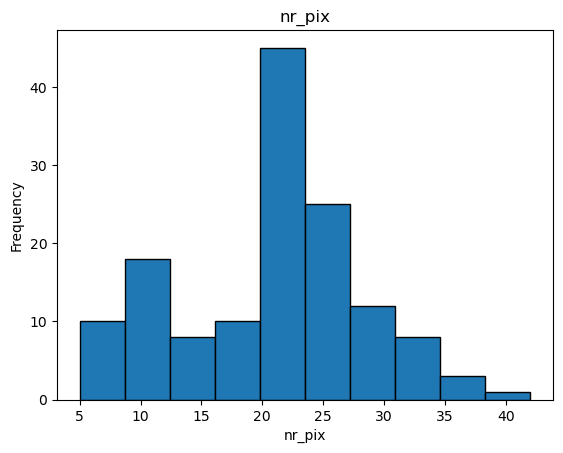

Skewness: -0.14169289555803818


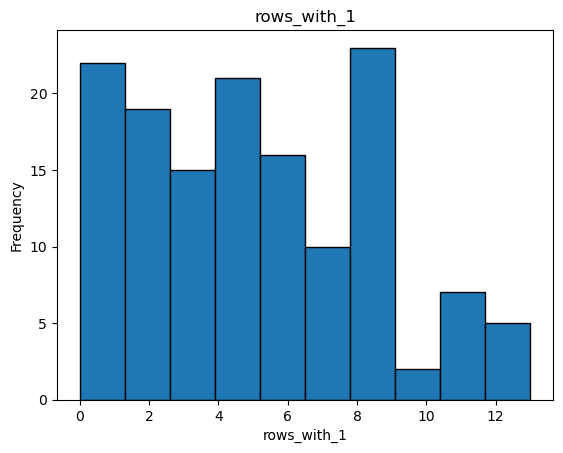

Skewness: 0.4043865693068703


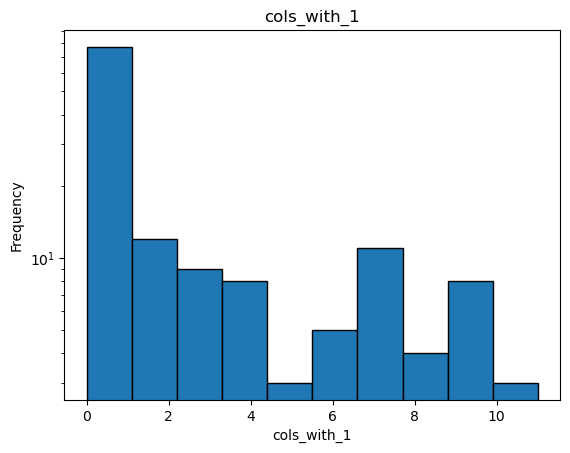

Skewness: 1.0205163782749351


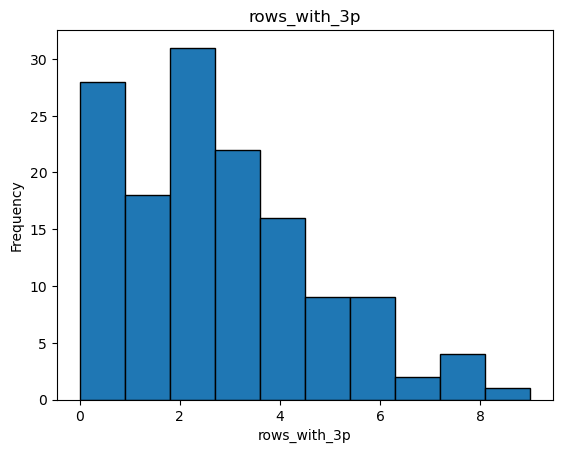

Skewness: 0.751745324457263


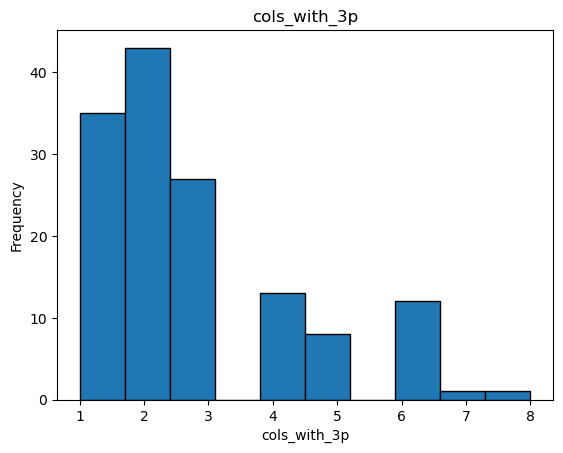

Skewness: 0.9728186785213437


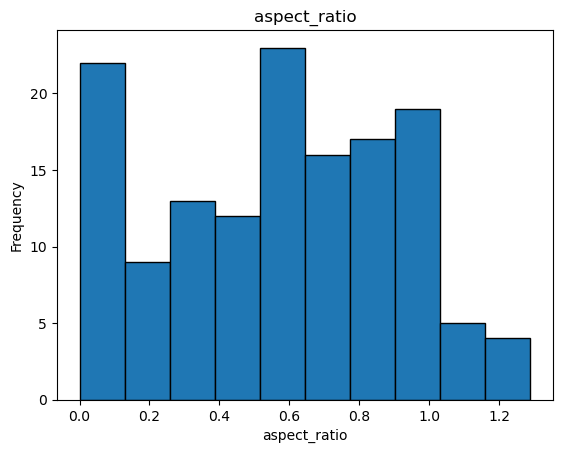

Skewness: -0.1095568610228991


In [5]:
#section 3.1
for x in range(2,8):
    skewness = sp.skew(df.iloc[:,x])
    if (skewness > 1 or skewness < -1):
        df.iloc[:,x].plot(kind="hist", edgecolor="black", logy = True)
        
    else:
        df.iloc[:, x].plot(kind="hist", edgecolor="black")
    plt.xlabel(df.iloc[:,x].name)
    plt.title(df.iloc[:,x].name)
    plt.show()
    print("Skewness:", skewness)
    plt.clf()

nr_pix
MEAN - Letters:  21.98 Non-Letters:  19.2
MEDIAN - Letters:  22.0 Non-Letters:  21.0
SD - Letters:  7.82 Non-Letters:  6.85
MAX - Letters:  42 Non-Letters:  34
MIN - Letters:  5 Non-Letters:  8


rows_with_1
MEAN - Letters:  5.26 Non-Letters:  4.8
MEDIAN - Letters:  6.0 Non-Letters:  3.0
SD - Letters:  2.99 Non-Letters:  3.72
MAX - Letters:  12 Non-Letters:  13
MIN - Letters:  0 Non-Letters:  0


cols_with_1
MEAN - Letters:  0.96 Non-Letters:  4.78
MEDIAN - Letters:  1.0 Non-Letters:  6.0
SD - Letters:  1.2 Non-Letters:  3.54
MAX - Letters:  4 Non-Letters:  11
MIN - Letters:  0 Non-Letters:  0


rows_with_3p
MEAN - Letters:  3.42 Non-Letters:  1.5
MEDIAN - Letters:  3.0 Non-Letters:  2.0
SD - Letters:  2.24 Non-Letters:  1.36
MAX - Letters:  9 Non-Letters:  6
MIN - Letters:  0 Non-Letters:  0


cols_with_3p
MEAN - Letters:  3.19 Non-Letters:  2.1
MEDIAN - Letters:  3.0 Non-Letters:  2.0
SD - Letters:  1.89 Non-Letters:  0.86
MAX - Letters:  8 Non-Letters:  4
MIN - Letters:  1 No

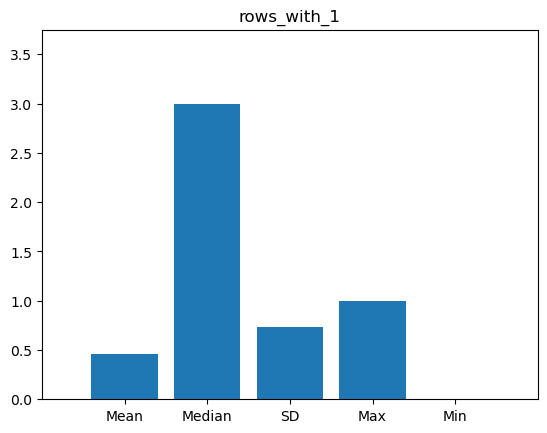



neigh_1
MEAN - Letters:  1.61 Non-Letters:  4.38
MEDIAN - Letters:  2.0 Non-Letters:  5.5
SD - Letters:  0.82 Non-Letters:  1.88
MAX - Letters:  4 Non-Letters:  6
MIN - Letters:  0 Non-Letters:  1


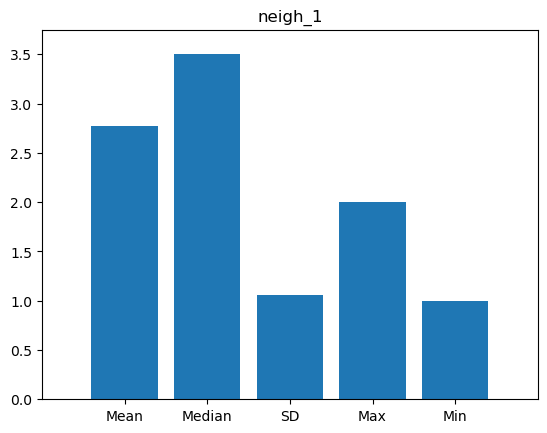



connected_areas
MEAN - Letters:  1.2 Non-Letters:  2.67
MEDIAN - Letters:  1.0 Non-Letters:  3.0
SD - Letters:  0.4 Non-Letters:  0.48
MAX - Letters:  2 Non-Letters:  3
MIN - Letters:  1 Non-Letters:  2


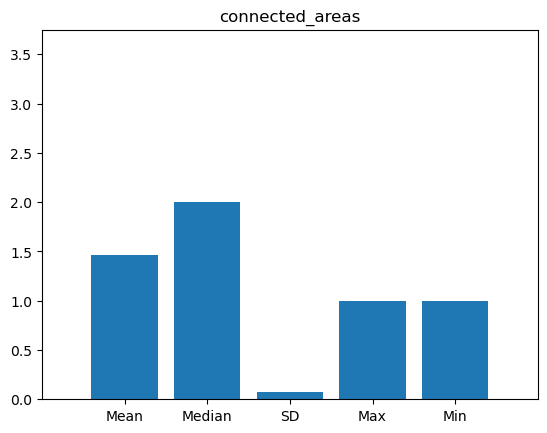

In [69]:
#section 3.2
#struggled to figure out how to split into letters and non letters, found the head() and tail() methods in the practicals
for x in range (2, 18):
    column = df.columns[x]
    letters = df[column].head(80)
    non_letters = df[column].tail(60)
    
    summary[x-2, 0, 0], summary[x-2, 1, 0] = letters.mean(), non_letters.mean()
    summary[x-2, 0, 1], summary[x-2, 1, 1] = letters.median(), non_letters.median()
    summary[x-2, 0, 2], summary[x-2, 1, 2] = letters.std(), non_letters.std()
    summary[x-2, 0, 3], summary[x-2, 1, 3] = letters.max(), non_letters.max()
    summary[x-2, 0, 4], summary[x-2, 1, 4] = letters.min(), non_letters.min()
            
    print(column)
    print("MEAN -", "Letters: ", round(summary[x-2, 0, 0], 2), "Non-Letters: ", round(summary[x-2, 1, 0],2))
    print("MEDIAN -", "Letters: ", summary[x-2, 0, 1], "Non-Letters: ", summary[x-2, 1, 1])
    print("SD -", "Letters: ", round(summary[x-2, 0, 2],2), "Non-Letters: ", round(summary[x-2, 1, 2],2))
    print("MAX -", "Letters: ", round(summary[x-2, 0, 3]), "Non-Letters: ", round(summary[x-2, 1, 3]))
    print("MIN -", "Letters: ", round(summary[x-2, 0, 4]), "Non-Letters: ", round(summary[x-2, 1, 4]))
    
    print("\n")
for x in [3,8,15]:
    print(df.columns[x])
    print("MEAN -", "Letters: ", round(summary[x-2, 0, 0], 2), "Non-Letters: ", round(summary[x-2, 1, 0],2))
    print("MEDIAN -", "Letters: ", summary[x-2, 0, 1], "Non-Letters: ", summary[x-2, 1, 1])
    print("SD -", "Letters: ", round(summary[x-2, 0, 2],2), "Non-Letters: ", round(summary[x-2, 1, 2],2))
    print("MAX -", "Letters: ", round(summary[x-2, 0, 3]), "Non-Letters: ", round(summary[x-2, 1, 3]))
    print("MIN -", "Letters: ", round(summary[x-2, 0, 4]), "Non-Letters: ", round(summary[x-2, 1, 4]))
    plt.bar(["Mean", "Median", "SD", "Max", "Min"], abs(summary[x-2, 0] - summary[x-2, 1]))
    plt.axis([-1, 5, 0, 3.75])
    plt.title(df.columns[x])
    plt.savefig(df.columns[x] + ".png")
    plt.show()
    print("\n")

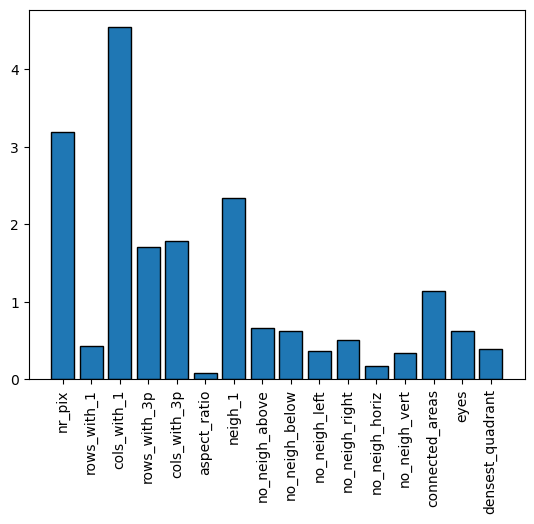

In [7]:
#section 3.3
summary_comp = np.empty((2, 16), dtype=object)
for x in range(0, 16):
    mean = summary[x, 0, 0] - summary[x, 1, 0]
    median = summary[x, 0, 1] - summary[x, 1, 1]
    sd = summary[x, 0, 2] - summary[x, 1, 2]
    xmax = summary[x, 0, 3] - summary[x, 1, 3]
    avg = (mean + median + sd) / 3
    summary_comp[0,x] = df.columns[x+2]
    summary_comp[1,x] = abs(avg)
    
plt.bar(summary_comp[0], summary_comp[1], edgecolor="black")
plt.xticks(rotation=90)
plt.show()